<a href="https://colab.research.google.com/github/noobnoob61/DeepLearning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM ,Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
series=np.sin((0.1*np.arange(400))**2)

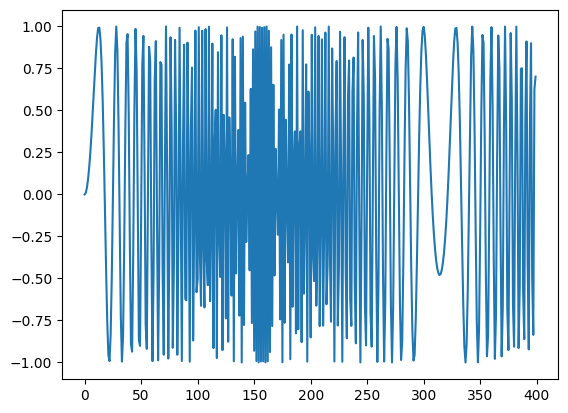

In [ ]:
plt.plot(series)
plt.show()

In [ ]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
     x=series[t:t+T]
     X.append(x)
     y=series[t+T]
     Y.append(y)
X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print("X.shape=",X.shape,"Y.shape=",Y.shape)

X.shape= (390, 10, 1) Y.shape= (390,)


Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 1.6940 - val_loss: 1.5221
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3263 - val_loss: 1.3871
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1062 - val_loss: 1.2487
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8418 - val_loss: 1.1388
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7532 - val_loss: 1.0425
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7118 - val_loss: 0.9689
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6170 - val_loss: 0.8984
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6116 - val_loss: 0.8323
Epoch 9/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5730 - val_loss: 0.7820
Epoch 10/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5834 - val_loss: 0.7403
Epoch 11/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5128 - val_loss: 0.7083
Epoch 12/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5130 - val_loss: 0.6812
E

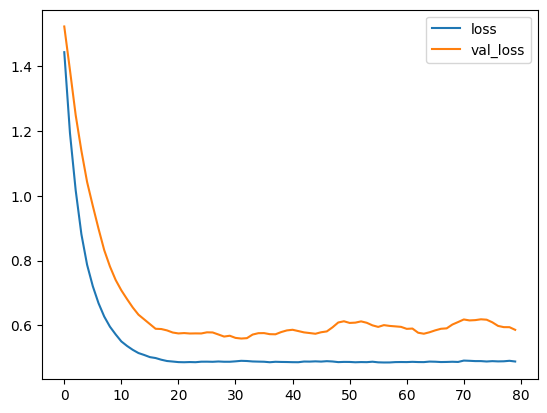

In [ ]:
#try autoregressive linear model
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.01),
)

# train RNN
r=model.fit(
    X[:-N//2], Y[:N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

#plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(390, 1)


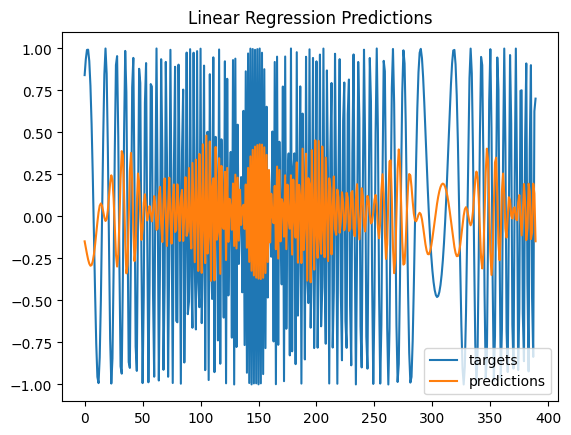

In [ ]:
# one step forecast using true targets

outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

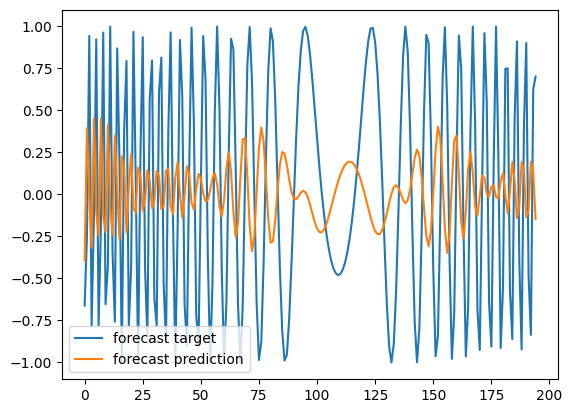

In [ ]:
# one step forecasting using true targets

validation_target = Y[-N//2:]
validation_predictions=[]

# index of first validation input
i = -N//2

while len(validation_predictions)<len(validation_target):
      p = model.predict(X[i].reshape(1, T, D))[0,0]
      i+=1
      validation_predictions.append(p)

plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

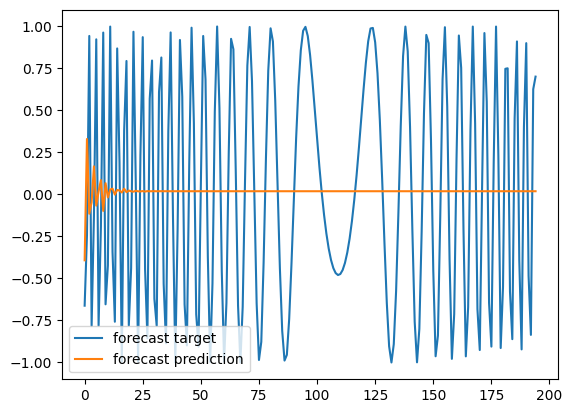

In [ ]:
#multistep forecast

validation_target=Y[-N//2:]
validation_predictions=[]

# last train input
last_x = X[-N//2]

while len(validation_predictions)< len(validation_target):
    p=model.predict(last_x.reshape(1,T,D))[0,0]
    validation_predictions.append(p)
    last_x=np.roll(last_x,-1)
    last_x[-1]=p

plt.plot(validation_target,label='forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()
plt.show()


In [ ]:
# try by RNN

X=X.reshape(-1,T,1)

# make RNN
i = Input(shape=(T,D))
x = SimpleRNN(10)(i)
x= Dense(1)(x)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.05),
)

# train the RNN

r = model.fit(
    X[:-N//2] , Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.8581 - val_loss: 0.8809
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5725 - val_loss: 0.6390
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4980 - val_loss: 0.5312
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4334 - val_loss: 0.4916
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3931 - val_loss: 0.5345
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3854 - val_loss: 0.4783
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3385 - val_loss: 0.3534
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2201 - val_loss: 0.2941
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2015 - val_loss: 0.2700
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1613 - val_loss: 0.1867
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1241 - val_loss: 0.2517
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1199 - val_lo

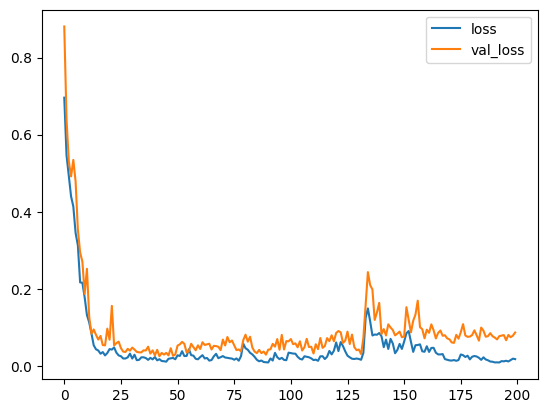

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(390, 1)


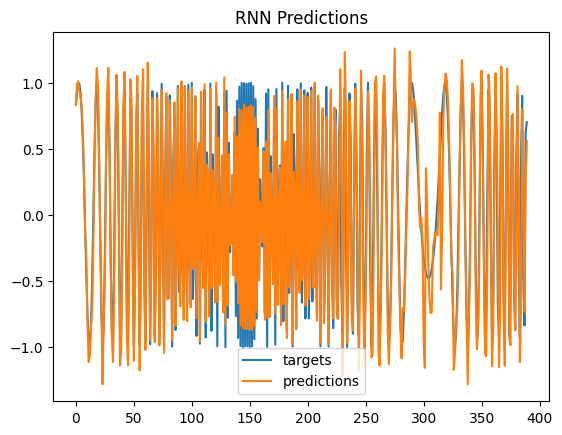

In [ ]:
# one step forecast using true targets

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.title("RNN Predictions")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

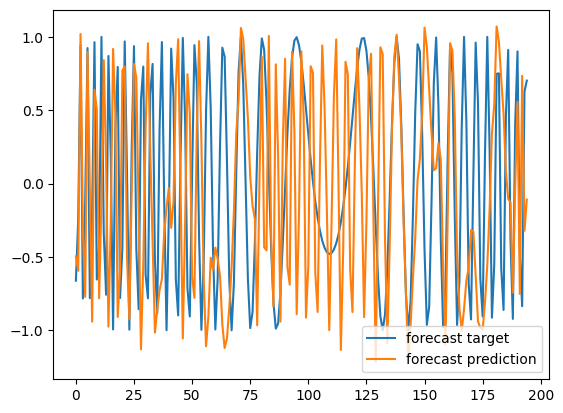

In [ ]:
# multi step forecast

forecast=[]
input=X[-N//2]
while len(forecast)< len(Y[-N//2:]):
  # reshape the input to N x T x D
  f = model.predict(input.reshape(1,T,D))[0,0]
  forecast.append(f)

  input=np.roll(input,-1)
  input[-1]=f

plt.plot(Y[-N//2:],label='forecast target')
plt.plot(forecast,label='forecast prediction')
plt.legend()
plt.show()


In [ ]:
# try by LSTM

X=X.reshape(-1,T,1)

# make RNN
i = Input(shape=(T,D))
x = LSTM(10)(i)
x= Dense(1)(x)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.05),
)

# train the RNN

r = model.fit(
    X[:-N//2] , Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.5370 - val_loss: 0.5423
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4156 - val_loss: 0.5283
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3658 - val_loss: 0.4169
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2357 - val_loss: 0.3848
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2050 - val_loss: 0.2982
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1334 - val_loss: 0.2636
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1158 - val_loss: 0.2034
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0842 - val_loss: 0.1537
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0782 - val_loss: 0.1600
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0885 - val_loss: 0.2562
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0779 - val_loss: 0.1244
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0528 - val_lo

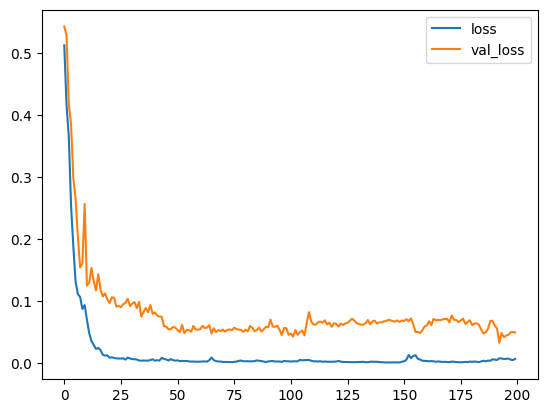

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
(390, 1)


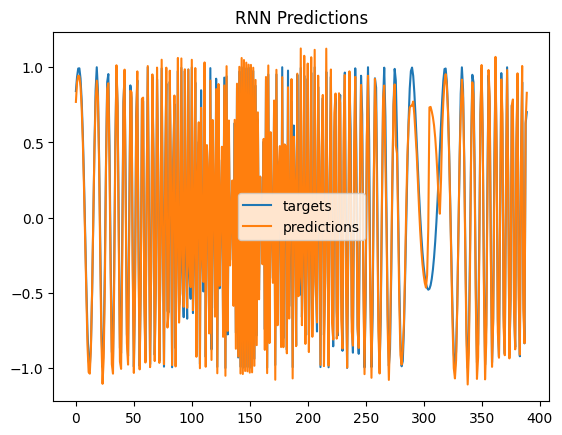

In [ ]:
# one step forecast using true targets

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y,label='targets')
plt.plot(predictions,label='predictions')
plt.title("RNN Predictions")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

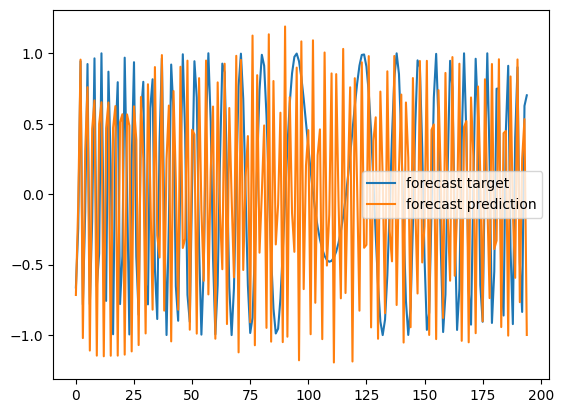

In [ ]:
# multi step forecast

forecast=[]
input=X[-N//2]
while len(forecast)< len(Y[-N//2:]):
  # reshape the input to N x T x D
  f = model.predict(input.reshape(1,T,D))[0,0]
  forecast.append(f)

  input=np.roll(input,-1)
  input[-1]=f

plt.plot(Y[-N//2:],label='forecast target')
plt.plot(forecast,label='forecast prediction')
plt.legend()
plt.show()

## LSTM by different Dataset

In [ ]:
# as previous data wasnt based on long term based dependencies so we change dataset for it
# so LSTM wasnt really good for this .. and it gives same performance as RNN

T = 10
D = 1
X = []
Y= []

def get_label(x, i1, i2, i3):
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0 :
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0 :
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0 :
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0 :
    return 1
  return 0

for t in range(500):
  x = np.random.randint(-T, T, size=3)
  X.append(x)
 # y= get_label(x, -1, -2, -3)  # short distance
  Y.append(y)
  y=get_label(x,0,1,2)    # long distance

X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print("X.shape=",X.shape,"Y.shape=",Y.shape)



X.shape= (150, 10, 1) Y.shape= (500,)


Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.5679 - loss: 81.8290 - val_accuracy: 0.4267 - val_loss: 58.0091
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5640 - loss: 74.0734 - val_accuracy: 0.4133 - val_loss: 51.8985
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5718 - loss: 69.2470 - val_accuracy: 0.4133 - val_loss: 46.5447
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5601 - loss: 51.6110 - val_accuracy: 0.4133 - val_loss: 41.6722
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5679 - loss: 56.7018 - val_accuracy: 0.4133 - val_loss: 37.0431
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5406 - loss: 42.5256 - val_accuracy: 0.4000 - val_loss: 32.9179
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5813 - loss: 39.4187 - val_accuracy: 0.4000 - val_loss: 29.1230
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6164 - loss: 30.7966 - val_accuracy: 0.4000 - v

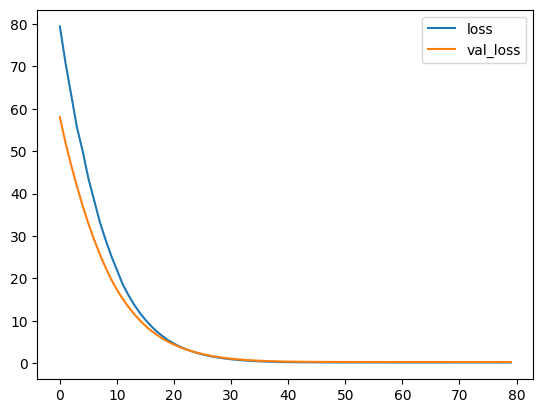

In [ ]:
#try autoregressive linear model
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# train RNN
r=model.fit(
    X[:-N//2], Y[:N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

#plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

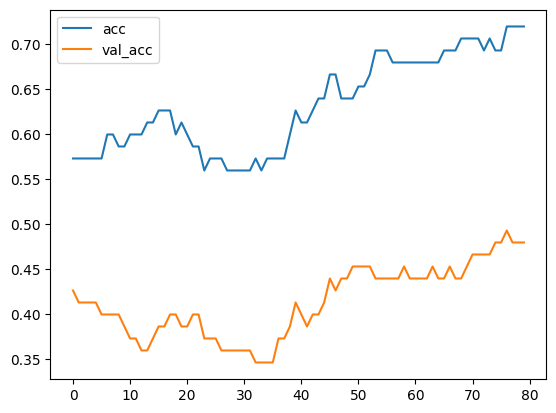

In [ ]:
plt.plot(r.history['accuracy'], label = 'acc' )
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Dropout
# try by RNN
inputs=np.expand_dims(X,-1)

# make RNN
i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dropout(0.5)(x)
x= Dense(1,activation="tanh")(x)                                                  # activation = tanh instead of sigmoid ?
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.05),
    metrics=['accuracy']
)

# train the RNN

r = model.fit(
    inputs,Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.4121 - loss: 0.9398 - val_accuracy: 0.5867 - val_loss: 0.3502
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4877 - loss: 0.8205 - val_accuracy: 0.5600 - val_loss: 0.2760
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5863 - loss: 0.4401 - val_accuracy: 0.4000 - val_loss: 0.3223
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5601 - loss: 0.3144 - val_accuracy: 0.3867 - val_loss: 0.3625
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5668 - loss: 0.2992 - val_accuracy: 0.3733 - val_loss: 0.3559
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5006 - loss: 0.3048 - val_accuracy: 0.3733 - val_loss: 0.3285
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5272 - loss: 0.2897 - val_accuracy: 0.4400 - val_loss: 0.3011
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5378 - loss: 0.2697 - val_accuracy: 0.4533 - val_loss

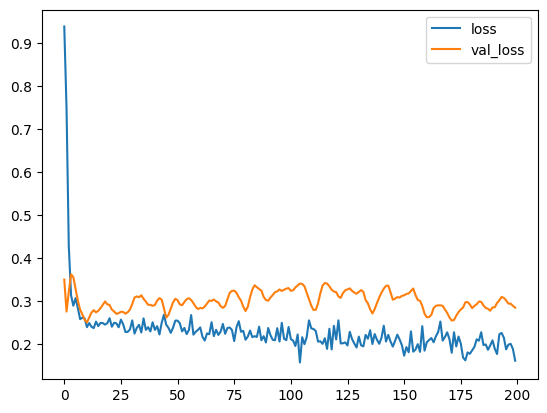

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

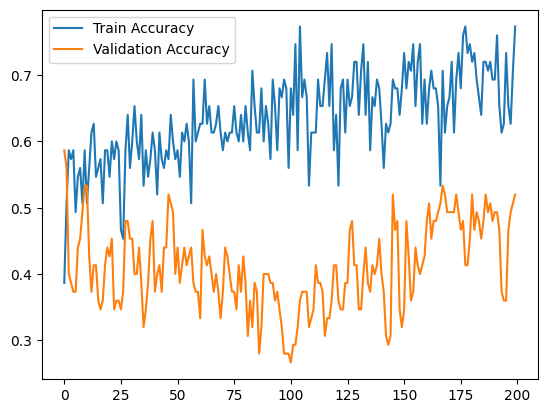

In [ ]:
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# try by LSTM

inputs=np.expand_dims(X,-1)

# make RNN
i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dropout(0.5)(x)
x= Dense(1,activation="tanh")(x)                                                  # activation = tanh instead of sigmoid ?
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.05),
    metrics=['accuracy']
)

# train the RNN

r = model.fit(
    inputs,Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.4732 - loss: 1.0467 - val_accuracy: 0.6133 - val_loss: 0.3126
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5468 - loss: 0.3533 - val_accuracy: 0.5333 - val_loss: 0.3028
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5089 - loss: 0.3178 - val_accuracy: 0.4400 - val_loss: 0.3251
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5323 - loss: 0.2898 - val_accuracy: 0.4000 - val_loss: 0.3297
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5061 - loss: 0.2752 - val_accuracy: 0.3600 - val_loss: 0.3155
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5808 - loss: 0.2620 - val_accuracy: 0.3733 - val_loss: 0.2947
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5479 - loss: 0.2559 - val_accuracy: 0.3867 - val_loss: 0.2756
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4916 - loss: 0.2622 - val_accuracy: 0.3867 - val_loss

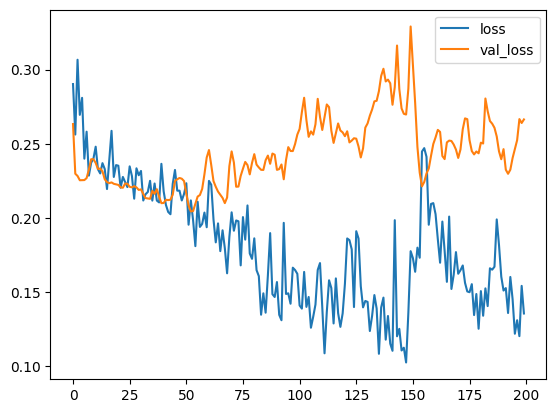

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

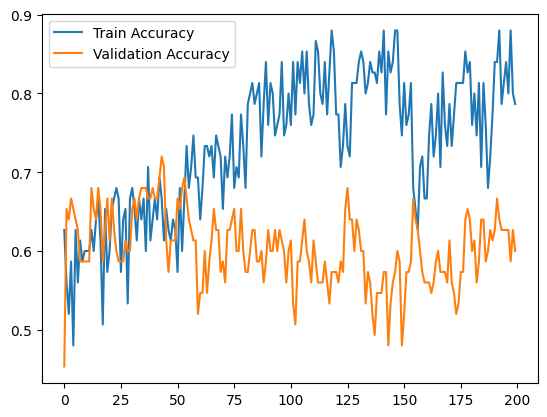

In [ ]:
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# simple code for xor problem

import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# XOR inputs and outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])

# Create a sequential model
model = Sequential()

# Add layers
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(inputs, outputs, epochs=200, verbose=0)

# Evaluate the model
print(model.evaluate(inputs, outputs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.5000 - loss: 0.7518
[0.7517743110656738, 0.5]
